## Chapter 1.2: Creating models from scratch in GemPy
***
So far we have shown the basics to create geological models by importing data from an external source (in especial GeoModeller 3D). In this chapter, we will explore the option available in GemPy to create the data directly in GemPy or to modify existing one. In this respect we will delve into the pandas DataFrames that contain the necessary data.

Let's start as always by importing the necessary dependencies:

In [3]:
#To-do:
#figure out how to efficiently get points from a geologic map
#georeference Nico's map and get coordinates and elevations for his strike & dip measurements
#import DEM (as tif) and geol map (as tif) into python, make sure they are referenced to each other
#enable interactive point picking 

In [1]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../../..")

# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
#%matplotlib inline


# Aux imports
import numpy as np
import pandas as pn
import matplotlib.pyplot as plt
%matplotlib inline
import theano

../../..\gempy\plotting\visualization.py:36: UserWarning: Steno 3D package is not installed. No 3D online visualization available.
  warnings.warn('Steno 3D package is not installed. No 3D online visualization available.')
../../..\gempy\posterior_analysis.py:24: UserWarning: pymc (v2) package is not installed. No support for stochastic simulation posterior analysis.
  warnings.warn("pymc (v2) package is not installed. No support for stochastic simulation posterior analysis.")
../../..\gempy\posterior_analysis.py:28: UserWarning: pymc (v3) package is not installed. No support for stochastic simulation posterior analysis.
  warnings.warn("pymc (v3) package is not installed. No support for stochastic simulation posterior analysis.")
../../..\gempy\posterior_analysis.py:35: UserWarning: tqdm package not installed. No support for dynamic progress bars.
  warnings.warn("tqdm package not installed. No support for dynamic progress bars.")


### Bringing all together: Real time plotting- Real time DataFrames

Now that we have seen how Qgrid is integrated with GemPy we can the interactivity of vtk and the df. Lets start over a `geo_data` object.


In [3]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../..")
import gempy as gp
geo_data = gp.InputData([ 580887,  589787, 5243012, 5248612,    1056,   3000], [89, 56, 50],
                       path_i='Chloe_interfaces.csv',
                       path_o='Chloe_orientations.csv')
#column names are case sensitive

In [4]:
geo_data.interfaces.head()

,X,Y,Z,formation,series,formation_number,order_series,isFault,annotations,formation_value
24,582189.47,5246000.86,1695.0,Drusberg,Default series,1,1,False,"${\bf{x}}_{\alpha \,{\bf{1}},0}$",1
25,582189.47,5246000.86,1695.0,Drusberg,Default series,1,1,False,"${\bf{x}}_{\alpha \,{\bf{1}},1}$",1
1,584332.40,5244351.58,1913.0,Garschella,Default series,2,1,False,"${\bf{x}}_{\alpha \,{\bf{2}},0}$",2
2,583618.02,5244708.77,2037.0,Garschella,Default series,2,1,False,"${\bf{x}}_{\alpha \,{\bf{2}},1}$",2
3,583745.02,5245835.89,1955.0,Garschella,Default series,2,1,False,"${\bf{x}}_{\alpha \,{\bf{2}},2}$",2


../../..\gempy\gempy_front.py:927: FutureWarning: gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead
  warnings.warn("gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead", FutureWarning)


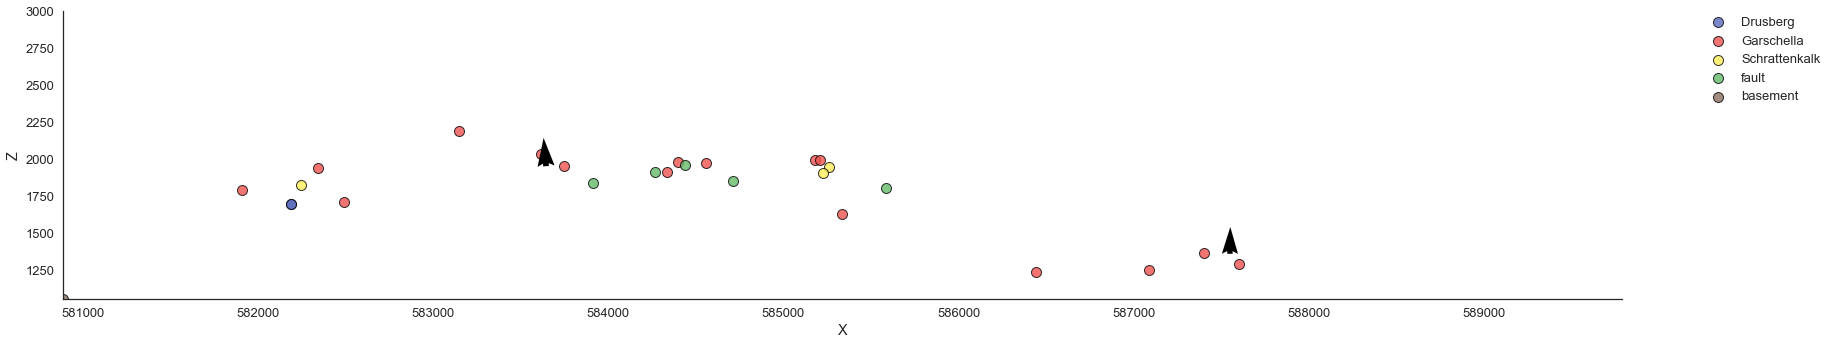

In [6]:
gp.plot_data(geo_data)

In [7]:
gp.get_data(geo_data, itype='formations')

,value,formation_number
Drusberg,1,1
Garschella,2,2
Schrattenkalk,3,3
fault,4,4
basement,5,5


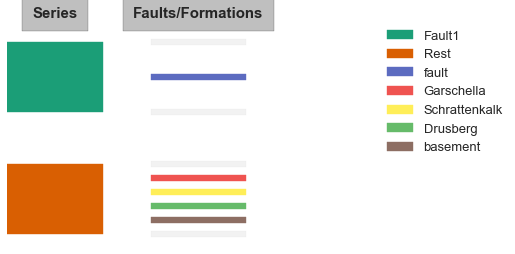

In [10]:
%matplotlib inline
gp.set_series(geo_data, {'Fault1': 'fault',
                         'Rest': ['Garschella', 'Schrattenkalk', 'Drusberg']}, verbose=1
             
             )

#gp.get_data(geo_data, 'series')

In [9]:
geo_data.interfaces

,X,Y,Z,formation,series,formation_number,order_series,isFault,annotations,formation_value
19,583911.18,5247199.16,1837.0,fault,Fault1,1,1,True,"${\bf{x}}_{\alpha \,{\bf{1}},0}$",1
18,585583.62,5248610.19,1804.0,fault,Fault1,1,1,True,"${\bf{x}}_{\alpha \,{\bf{1}},1}$",1
17,584265.99,5247378.81,1913.0,fault,Fault1,1,1,True,"${\bf{x}}_{\alpha \,{\bf{1}},2}$",1
16,584712.08,5247750.82,1854.0,fault,Fault1,1,1,True,"${\bf{x}}_{\alpha \,{\bf{1}},3}$",1
15,584437.44,5247476.18,1958.0,fault,Fault1,1,1,True,"${\bf{x}}_{\alpha \,{\bf{1}},4}$",1
6,587086.72,5245677.14,1251.0,Garschella,Rest,2,2,False,"${\bf{x}}_{\alpha \,{\bf{2}},0}$",2
0,583149.71,5245034.20,2189.0,Garschella,Rest,2,2,False,"${\bf{x}}_{\alpha \,{\bf{2}},1}$",2
22,582342.20,5246304.08,1940.0,Garschella,Rest,2,2,False,"${\bf{x}}_{\alpha \,{\bf{2}},2}$",2
21,581910.93,5243776.11,1789.0,Garschella,Rest,2,2,False,"${\bf{x}}_{\alpha \,{\bf{2}},3}$",2
20,582493.01,5244328.43,1710.0,Garschella,Rest,2,2,False,"${\bf{x}}_{\alpha \,{\bf{2}},4}$",2


In [10]:
gp.set_orientation_from_interfaces(geo_data, [17,18,19] )
#need to add an orientation because each series needs to have at minimum one orientation and 
#one interface. This function calculates an orientation from 3 or more points (preferably close 
#together, but not in a line)
#ALSO: each layer (within a series) needs at least 2 interfaces (but they can be duplicate)


,X,Y,Z,G_x,G_y,G_z,dip,azimuth,polarity,formation,series,formation_number,order_series,isFault,annotations,formation_value
2,584586.93,5.247729e+06,1851.333333,-0.421298,0.516779,0.745283,41.816559,320.811737,1.0,fault,Fault1,1,1,True,"${\bf{x}}_{\beta \,{\bf{1}},0}$",1
0,587549.48,5.246858e+06,1360.000000,0.012507,0.358150,0.933580,21.000000,2.000000,1.0,Garschella,Rest,2,2,False,"${\bf{x}}_{\beta \,{\bf{2}},0}$",2
1,583644.48,5.245876e+06,1953.000000,-0.086824,0.150384,0.984808,10.000000,330.000000,1.0,Garschella,Rest,2,2,False,"${\bf{x}}_{\beta \,{\bf{2}},1}$",2


In [11]:
gp.plot_data_3D(geo_data)

../../..\gempy\gempy_front.py:1016: FutureWarning: gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead
  "use gempy.plotting module instead", FutureWarning)


Next we can directly compile an `interp_data` objects. However, theano requires at least an interface and orientation. If we try to compile an empty `geo_data`, `GemPy` will create default points at the center of the extent. Let's try it out:

In [12]:
interp_data = gp.InterpolatorData(geo_data, compile_theano=True,
                                  theano_optimizer='fast_compile', is_lith=True, is_fault=True)

#only have to compile once UNLESS change presence of faults or not (number of faults doesn't matter)
#can change the number of fms & faults afterwards

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float32
Number of faults:  1


In [13]:
interp_data.update_interpolator(geo_data)

In [14]:
lith, fault = gp.compute_model(interp_data)

In [15]:
lith
#lith is two arrays (each with dim: model extent) with a formation number assigned to each cell

array([[ 5.      ,  5.      ,  5.      , ...,  2.      ,  2.      ,
         2.      ],
       [30.483852, 30.485573, 30.487293, ..., 30.678577, 30.681934,
        30.68528 ]], dtype=float32)

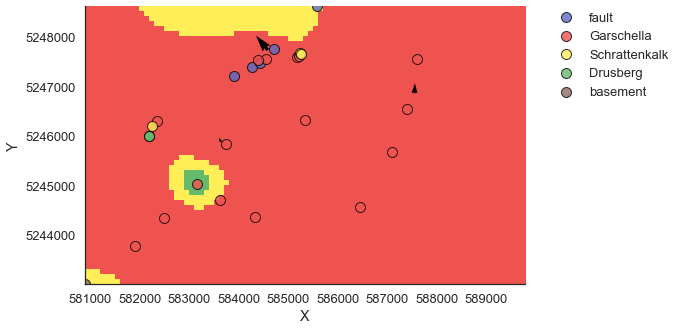

In [16]:
gp.plotting.plot_section(geo_data, lith[0], 25, plot_data=True, direction='z')

In [17]:
ver, sim = gp.get_surfaces(interp_data, lith[1], fault[1])

In [18]:
gp.plotting.plot_surfaces_3D_real_time(geo_data, interp_data, ver, sim)

## Crop the topography

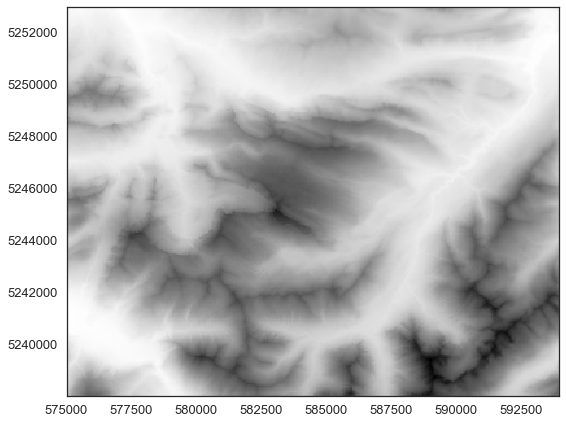

In [19]:
import geopandas as geo
import matplotlib.pyplot as plt

a = geo.read_file('Export_Output.shx', enabled_drivers=['GeoJSON', 'ESRI Shapefile']) #import shapefile (must be .shx not .shp)
im = a['GRID_CODE'].values.reshape(300,380)   #reshape data from x,y,z to a grid
plt.imshow(im, extent=(a['x'].min(), a['x'].max(), a['y'].min(), a['y'].max() )) #plot raster as image


In [20]:
import gdal
hallo = gdal.Open('DEMraster100.tif')    #DEM must be tif (go back to ArcMap & export a 50m resolution square tif (NOT cropped to watershed boundaries))



In [21]:
def import_dtm(path_dtm):
    '''returns: osgeo.gdal.Dataset'''
    #import_data_csv
    if path_dtm:
        dtm = gdal.Open(path_dtm)
    return dtm

def compare_extent(dtm, geo_data, show=True):
    dtm_extent, dtm_resolution = gdal2geodata_extent(dtm)
    cornerpoints_geo = get_cornerpoints(geo_data.extent)
    cornerpoints_dtm = get_cornerpoints(dtm_extent)
    
    if show:
        plt.style.use('bmh')
        plt.plot(cornerpoints_geo[:,0], cornerpoints_geo[:,1], 'ro', markersize = 12, label = 'Geo_data extent')
        plt.plot(cornerpoints_dtm[:,0], cornerpoints_dtm[:,1], 'gX',markersize = 11, label = 'DTM extent')
        plt.title('Extent comparison')
        plt.legend(loc=0, fancybox=True, shadow=True)
        plt.show()
        
    if np.any(cornerpoints_geo[:2]-cornerpoints_dtm[:2]) != 0:
        print('Extent of geo_data and DTM do not match. Use function cropDTMtogeodata to crop')
    else:
        print('Extent of geo_data and DTM match. You may continue!')
    
def gdal2geodata_extent(dtm):
    '''can return dtm.extent and dtm.resolution'''
    ulx, xres, xskew, uly, yskew, yres  = dtm.GetGeoTransform()
    z = dtm.ReadAsArray()
    if np.any(np.array([xskew,yskew]))!= 0:
        print('Obacht! DTM is not north-oriented. Stop.')
    lrx = ulx + (dtm.RasterXSize * xres)
    lry = uly + (dtm.RasterYSize * yres)
    res = np.array([(uly-lry)/(-yres),(lrx-ulx)/xres]).astype(int)   
    return np.array([ulx, lrx, lry, uly, z.min(), z.max()]).astype(int), res

def get_cornerpoints(extent):
    upleft = ([extent[0], extent[3]]) 
    lowleft = ([extent[0], extent[2]]) 
    upright = ([extent[1], extent[3]]) 
    lowright = ([extent[1], extent[2]]) 
    return np.array([upleft,lowleft,upright,lowright])

def cropDTM2geodata(path_dest, dtm, geo_data):
    new_bounds = (geo_data.extent[0], geo_data.extent[2], geo_data.extent[1], geo_data.extent[3])
    #destName = "C:\\Users\\elisa\\Documents\\git\\MSc\\GempyTopography\\cropped_DTM.tif"
    gdal.Warp(path_dest, dtm, options = gdal.WarpOptions(
        options = ['outputBounds'], outputBounds=new_bounds))
    return gdal.Open(path_dest)

def tif2xyz(path_dest, dtm):
    '''returns array with the x,y,z coordinates of the topography.'''
    shape = dtm.ReadAsArray().shape
    #print(shape)
    gdal.Translate(path_dest, dtm, options=gdal.TranslateOptions(options = ['format'],format = "XYZ"))
    xyz = pn.read_csv(path_dest, header=None, sep = ' ').as_matrix()
    return np.dstack([xyz[:,0].reshape(shape),xyz[:,1].reshape(shape),xyz[:,2].reshape(shape)])

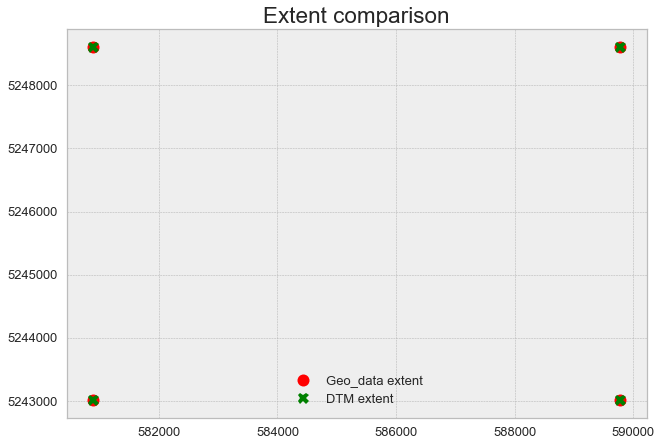

Extent of geo_data and DTM match. You may continue!


In [22]:
compare_extent(hallo, geo_data)

In [23]:
cropped = hallo

In [24]:
cropped.ReadAsArray()[cropped.ReadAsArray() == 32767] = 1000

In [25]:
cropped.ReadAsArray()

array([[32767, 32767, 32767, ..., 32767, 32767, 32767],
       [32767, 32767, 32767, ..., 32767, 32767, 32767],
       [32767, 32767, 32767, ..., 32767, 32767, 32767],
       ...,
       [32767, 32767, 32767, ..., 32767, 32767, 32767],
       [32767, 32767, 32767, ..., 32767, 32767, 32767],
       [32767, 32767, 32767, ..., 32767, 32767, 32767]], dtype=int16)

In [129]:
g = tif2xyz('xyz', cropped)
g.reshape(-1, 3)

C:\Users\Chloe\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


array([[ 580937.5, 5248562.5,   32767. ],
       [ 581037.5, 5248562.5,   32767. ],
       [ 581137.5, 5248562.5,   32767. ],
       ...,
       [ 589537.5, 5243062.5,   32767. ],
       [ 589637.5, 5243062.5,   32767. ],
       [ 589737.5, 5243062.5,   32767. ]])

In [130]:
g2 = g.reshape(-1, 3)
g2[g2[:,2] == 32767, 2] = 1

In [131]:
g2

array([[5.8093750e+05, 5.2485625e+06, 1.0000000e+00],
       [5.8103750e+05, 5.2485625e+06, 1.0000000e+00],
       [5.8113750e+05, 5.2485625e+06, 1.0000000e+00],
       ...,
       [5.8953750e+05, 5.2430625e+06, 1.0000000e+00],
       [5.8963750e+05, 5.2430625e+06, 1.0000000e+00],
       [5.8973750e+05, 5.2430625e+06, 1.0000000e+00]])

In [136]:
lith, fault = gp.compute_model_at(g2, interp_data)


In [133]:
g.shape

(56, 89, 3)

In [134]:
56 * 89

4984

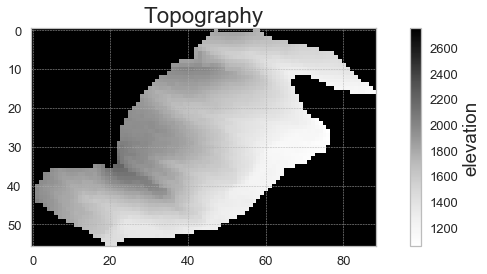

In [26]:
plt.figure(figsize=(12,4))
vdtm = plt.imshow(cropped.ReadAsArray(), vmax=2750)
plt.title("Topography")
cbar = plt.colorbar(vdtm)
cbar.set_label('elevation')

In [27]:
lb = lith[0].reshape(geo_data.resolution)

In [28]:
extent_dtm, res_dtm = gdal2geodata_extent(cropped)

In [91]:
dtm = cropped.ReadAsArray()
dtm[dtm==32767] = 1056

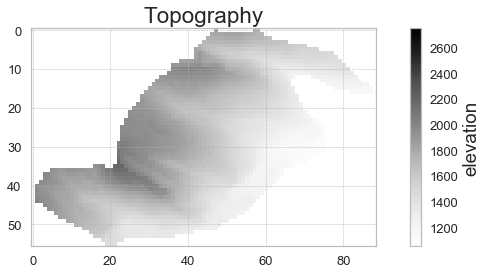

In [93]:
plt.figure(figsize=(12,4))
vdtm = plt.imshow(dtm, vmax=2750)
plt.title("Topography")
cbar = plt.colorbar(vdtm)
cbar.set_label('elevation')

In [89]:
from copy import copy
def height_ind(dtm, zs):
    '''calculate 'indices': array with shape (ext1, ext2) where the values
    are similar if the elevation is similar.'''  
    #zs = np.linspace(geo_data.extent[4], geo_data.extent[5], lb.shape[2])
    #dz = geo_data.extent[5] - geo_data.extent[4])/geo_data.resolution[2]
    # dz is number of points in z direction
    dz = (zs[-1] - zs[0]) / len(zs)
    #2. substract minimum value (here -1000) from each value of dtm and divide it by dz
    dtm_v = (dtm - zs[0]) / dz
    return dtm_v.astype(int)


def calculate_geomap(lb, dtm, geo_data, plot=True):
    zs = np.linspace(geo_data.extent[4], geo_data.extent[5], lb.shape[2])
    indices = height_ind(dtm,zs).T   
    geomap = np.zeros((lb.shape[0],lb.shape[1]))
    for x in range(lb.shape[0]):
        for y in range(lb.shape[1]):
            geomap[x,y] = lb[x,y,indices[x,y]]   
    if plot:
        plt.imshow(geomap.T, origin="upper", cmap=gp.plotting.colors.cmap, norm=gp.plotting.colors.norm)
        plt.title("Geological map")    
    return geomap.T  

def extend_lithblock(lb, factor):
    fertig2 = []
    for i in range(0,lb.shape[2]):
        lb_sub=lb[:,:,i]
        fertig = []
        for j in range(0, lb.shape[0]):
            y = np.repeat(lb_sub[j,:], factor)
            fertig = np.append(fertig, [y]*factor)
        fertig = fertig.reshape(lb.shape[0]*factor, lb.shape[1]*factor)
        fertig2.append(fertig)
        fertig2.append(fertig)
        fertig2.append(fertig)
        fertig2.append(fertig)
    return np.dstack(fertig2)

def mask_lith_block_above_topo(lb, geo_data, dtm):
    '''hier wird allen Werten die oberhalb der topographie 
    liegen ein minus eins zugewiesen und das dann maskiert'''
    zs = np.linspace(geo_data.extent[4], geo_data.extent[5], lb.shape[2])
    indices = height_ind(dtm,zs).T

    geoblock = copy(lb)
    for x in range(lb.shape[0]):
        for y in range(lb.shape[1]):
            z = indices[x,y]
            geoblock[x,y,z:] = -1
    
    return np.ma.masked_where(geoblock < 0, geoblock)

In [69]:
np.unique(height_ind(dtm,np.linspace(geo_data.extent[4], geo_data.extent[5], lb.shape[2])).T)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 49])

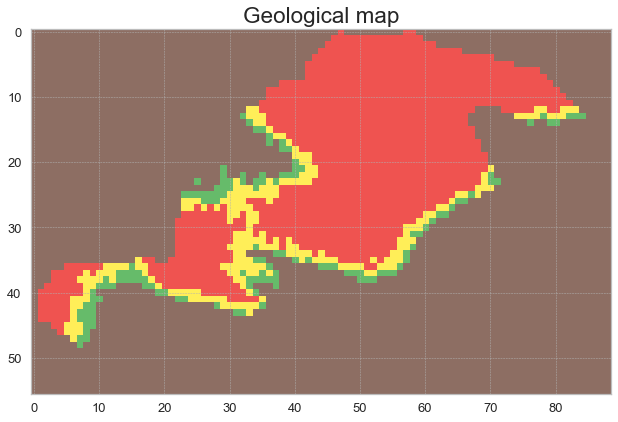

In [95]:
geomap = calculate_geomap(lb,dtm, geo_data, plot = True)


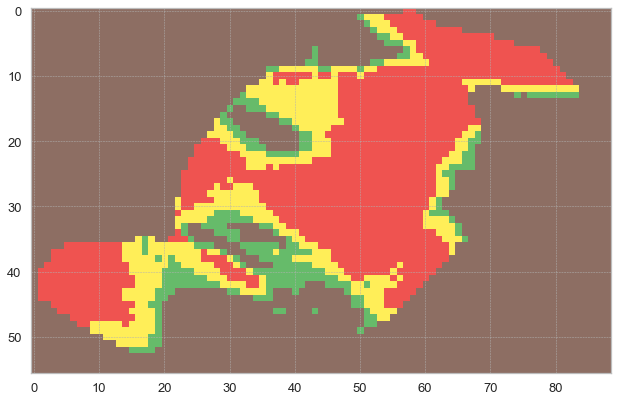

In [135]:
plt.imshow(lith[0].reshape(56, 89),  origin="upper", cmap=gp.plotting.colors.cmap, norm=gp.plotting.colors.norm)

In [96]:
dtm

array([[1056, 1056, 1056, ..., 1056, 1056, 1056],
       [1056, 1056, 1056, ..., 1056, 1056, 1056],
       [1056, 1056, 1056, ..., 1056, 1056, 1056],
       ...,
       [1056, 1056, 1056, ..., 1056, 1056, 1056],
       [1056, 1056, 1056, ..., 1056, 1056, 1056],
       [1056, 1056, 1056, ..., 1056, 1056, 1056]], dtype=int16)

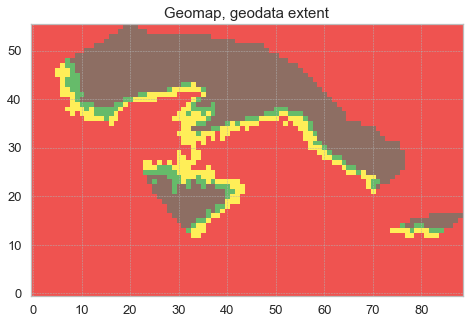

In [71]:
plt.figure(1, figsize = (10,5))
plt.imshow(geomap, origin="lower", cmap=gp.plotting.colors.cmap, norm=gp.plotting.colors.norm)
plt.title("Geomap, geodata extent", fontsize = 15)   

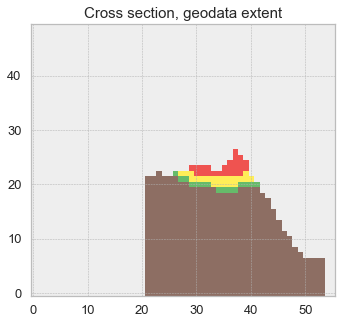

In [94]:
geoblock = mask_lith_block_above_topo(lb, geo_data, dtm)
plt.figure(1, figsize = (10,5))
fig = plt.imshow(geoblock[25,:,:].T, origin="lower", cmap=gp.plotting.colors.cmap,norm=gp.plotting.colors.norm)
plt.title("Cross section, geodata extent", fontsize = 15)  

In [73]:

lb.shape

(89, 56, 50)